In [1]:
#import functions
%run SVM_Grain_Area_Functions.ipynb
#create dataset
path = 'Data Files/EBSD Raw Data'
dataset=[]
#open all files
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename, 'r') as f:
        #remove comments
        for line in f:
            if '#' not in line:
                break
        
        #load to np array and add to dataset
        data=np.loadtxt(filename, usecols=(0,1,2,3,4,8,9))
        dataset.append(data)

In [27]:
x=dataset[0] #testing
#slice raw data
raw_data=x
raw_data_copy=np.copy(raw_data)
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=np.unique(raw_data[np.where(raw_data[:,6]==1),5])

#define p
count=grain_areas(raw_data,return_p=True)
mean=np.mean(count)

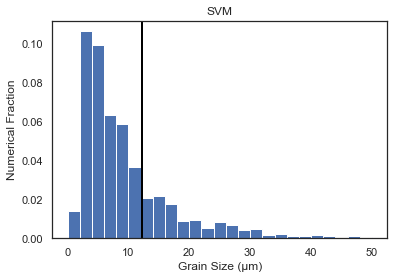

In [34]:
#Numerical Fraction
plt.title('SVM')
plt.ylabel('Numerical Fraction')
plt.xlabel('Grain Size (μm)')
plt.hist(count, bins=25, range=(0.01,50), density=True)
plt.axvline(mean,color='black',linewidth=2)

(array([0.00239794, 0.03468342, 0.05232127, 0.0460953 , 0.0553548 ,
        0.0419928 , 0.02809632, 0.03367225, 0.0313032 , 0.01749339,
        0.02007912, 0.01226415, 0.02178368, 0.0193424 , 0.01252417,
        0.014951  , 0.00647154, 0.008335  , 0.00527257, 0.00567705,
        0.00788719, 0.00612485, 0.00436251, 0.00687601, 0.00473809]),
 array([1.00000e-02, 2.00960e+00, 4.00920e+00, 6.00880e+00, 8.00840e+00,
        1.00080e+01, 1.20076e+01, 1.40072e+01, 1.60068e+01, 1.80064e+01,
        2.00060e+01, 2.20056e+01, 2.40052e+01, 2.60048e+01, 2.80044e+01,
        3.00040e+01, 3.20036e+01, 3.40032e+01, 3.60028e+01, 3.80024e+01,
        4.00020e+01, 4.20016e+01, 4.40012e+01, 4.60008e+01, 4.80004e+01,
        5.00000e+01]),
 <BarContainer object of 25 artists>)

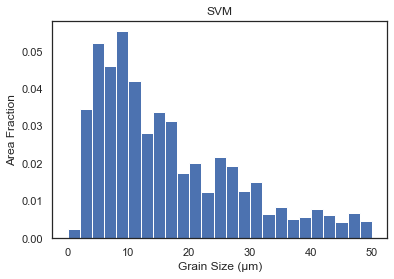

In [35]:
#Area Fraction
plt.title('SVM')
plt.ylabel('Area Fraction')
plt.xlabel('Grain Size (μm)')
plt.hist(count, bins=25, range=(0.01,50), density=True, weights=count)
# plt.axvline(mean,color='black',linewidth=2)

(array([ 1.,  0.,  2.,  0.,  0.,  3.,  0.,  8.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

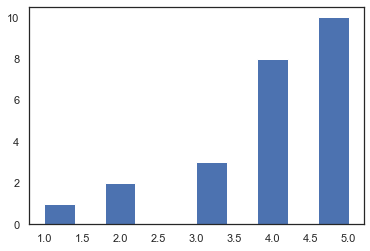

In [26]:
test_array=np.array([5,5,4,4,2,1,3])
plt.hist(test_array, weights=test_array)

In [2]:
#gamma=10e-3
p_list=[]
for y in range (0,1,1):
    x=dataset[y]
    #slice raw data
    raw_data=x
    coords=raw_data[:,3:5] 
    grain_IDs=raw_data[:,5]
    grain_IDs_and_edges=raw_data[:,5:7]
    coords_and_grains=raw_data[:,3:6]
    coords_and_grains_copy=np.copy(coords_and_grains)
    edge_grains=grain_IDs_and_edges[np.where(grain_IDs_and_edges[:,1]==1)]
    p_list.append(grain_areas(raw_data,return_p=True))
print(p_list)
%store p_list

[(array([0.01430175, 0.10657113, 0.09965093, 0.06366587, 0.0590524 ,
       0.0364464 , 0.02076061, 0.0216833 , 0.01753118, 0.00876559,
       0.00922694, 0.00507482, 0.00830424, 0.0069202 , 0.00415212,
       0.00461347, 0.00184539, 0.00230673, 0.00138404, 0.00138404,
       0.00184539, 0.00138404, 0.00092269, 0.00138404, 0.00092269,
       0.        ]), 12.2973666274, 665.5975987659076)]
Stored 'p_list' (list)


In [3]:
%store -r
p_list[0]

(array([0.01430175, 0.10657113, 0.09965093, 0.06366587, 0.0590524 ,
        0.0364464 , 0.02076061, 0.0216833 , 0.01753118, 0.00876559,
        0.00922694, 0.00507482, 0.00830424, 0.0069202 , 0.00415212,
        0.00461347, 0.00184539, 0.00230673, 0.00138404, 0.00138404,
        0.00184539, 0.00138404, 0.00092269, 0.00138404, 0.00092269,
        0.        ]), 12.2973666274, 665.5975987659076)

In [4]:
#cross-check results with voronoi

In [16]:
#import functions
%run SVM_Grain_Area_Functions.ipynb
hex_sym_ops=hexagonal_sym_ops()

#how big is each file before pieces are removed?
file_size=100000

#number of trials to avg
# num_trials=len(dataset)
num_trials=1

#number of points to sample
sizes=np.arange(10,11000,1000)
percents=(sizes/file_size)*100

#six different sampling methods (random, square, hex, sobol, gold, window)
divergences=np.zeros((len(sizes),6))
means=np.zeros((len(sizes),6))
variances=np.zeros((len(sizes),6))

#store total means
total_means=[]
total_vars=[]

# for each file
# for x in dataset:
x=dataset[0] #testing
#tab***********
#slice raw data
raw_data=x
raw_data_copy=np.copy(raw_data)
coords=raw_data[:,3:5] 
grain_IDs=raw_data[:,5]
grain_IDs_and_edges=raw_data[:,5:7]
coords_and_grains=raw_data[:,3:6]
coords_and_grains_copy=np.copy(coords_and_grains)
edge_grains=np.unique(raw_data[np.where(raw_data[:,6]==1),5])

#define p
p,total_mean,total_var=grain_areas(raw_data,return_p=True)
total_means.append(total_mean)
total_vars.append(total_var)

#divergence for each method    
random_div=np.zeros(len(percents))
square_div=np.zeros(len(percents))
hex_div=np.zeros(len(percents))
sobol_div=np.zeros(len(percents))
gold_div=np.zeros(len(percents))
window_div=np.zeros(len(percents))
#mean for each method    
random_mean=np.zeros(len(percents))
square_mean=np.zeros(len(percents))
hex_mean=np.zeros(len(percents))
sobol_mean=np.zeros(len(percents))
gold_mean=np.zeros(len(percents))
window_mean=np.zeros(len(percents))
#var for each method    
random_var=np.zeros(len(percents))
square_var=np.zeros(len(percents))
hex_var=np.zeros(len(percents))
sobol_var=np.zeros(len(percents))
gold_var=np.zeros(len(percents))
window_var=np.zeros(len(percents))

index=0
for x in percents:
    #append divergence, mean, and variance
    random_div[index], random_mean[index], random_var[index] = sample(sizes[index],'random')
    square_div[index], square_mean[index], square_var[index] = sample(sizes[index],'square')
    hex_div[index], hex_mean[index], hex_var[index] = sample(sizes[index],'hex')
    sobol_div[index], sobol_mean[index], sobol_var[index] = sample(sizes[index],'sobol')
    gold_div[index], gold_mean[index], gold_var[index] = sample(sizes[index],'gold')
    window_div[index], window_mean[index], window_var[index] = sample(sizes[index],'window')
    index+=1

#add to array
divergences[:,0]+=random_div
divergences[:,1]+=square_div
divergences[:,2]+=hex_div
divergences[:,3]+=sobol_div
divergences[:,4]+=gold_div
#     divergences[:,5]+=window_div
means[:,0]+=random_mean
means[:,1]+=square_mean
means[:,2]+=hex_mean
means[:,3]+=sobol_mean
means[:,4]+=gold_mean
means[:,5]+=window_mean
variances[:,0]+=random_var
variances[:,1]+=square_var
variances[:,2]+=hex_var
variances[:,3]+=sobol_var
variances[:,4]+=gold_var
variances[:,5]+=window_var
#tab***********

# #average results        
divergences=divergences/num_trials
means=means/num_trials
variances=variances/num_trials
total_mean_avg=sum(total_means)/len(total_means)
total_var_avg=sum(total_vars)/len(total_vars)

# #slice results
avg_random_div=divergences[:,0]
avg_hex_div=divergences[:,1]
avg_square_div=divergences[:,2]
avg_sobol_div=divergences[:,3]
avg_gold_div=divergences[:,4]
avg_window_div=divergences[:,5]

avg_random_mean=means[:,0]
avg_hex_mean=means[:,1]
avg_square_mean=means[:,2]
avg_sobol_mean=means[:,3]
avg_gold_mean=means[:,4]
avg_window_mean=means[:,5]

avg_random_var=variances[:,0]
avg_hex_var=variances[:,1]
avg_square_var=variances[:,2]
avg_sobol_var=variances[:,3]
avg_gold_var=variances[:,4]
avg_window_var=variances[:,5]

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [25]:
# sizes=np.arange(10,11000,1000)
# percents=(sizes/file_size)*100
%store percents

Stored 'percents' (ndarray)


In [26]:
%store total_mean_avg
%store total_var_avg

Stored 'total_mean_avg' (float64)
Stored 'total_var_avg' (float64)


In [27]:
%store avg_random_div
%store avg_hex_div
%store avg_square_div
%store avg_sobol_div
%store avg_gold_div
%store avg_window_div

%store avg_random_mean
%store avg_hex_mean
%store avg_square_mean
%store avg_sobol_mean
%store avg_gold_mean
%store avg_window_mean

%store avg_random_var
%store avg_hex_var
%store avg_square_var
%store avg_sobol_var
%store avg_gold_var
%store avg_window_var

Stored 'avg_random_div' (ndarray)
Stored 'avg_hex_div' (ndarray)
Stored 'avg_square_div' (ndarray)
Stored 'avg_sobol_div' (ndarray)
Stored 'avg_gold_div' (ndarray)
Stored 'avg_window_div' (ndarray)
Stored 'avg_random_mean' (ndarray)
Stored 'avg_hex_mean' (ndarray)
Stored 'avg_square_mean' (ndarray)
Stored 'avg_sobol_mean' (ndarray)
Stored 'avg_gold_mean' (ndarray)
Stored 'avg_window_mean' (ndarray)
Stored 'avg_random_var' (ndarray)
Stored 'avg_hex_var' (ndarray)
Stored 'avg_square_var' (ndarray)
Stored 'avg_sobol_var' (ndarray)
Stored 'avg_gold_var' (ndarray)
Stored 'avg_window_var' (ndarray)


<AxesSubplot:title={'center':'Divergences - SVM (Dataset 1), Area Fraction'}, xlabel='Percent', ylabel='JS Divergence'>

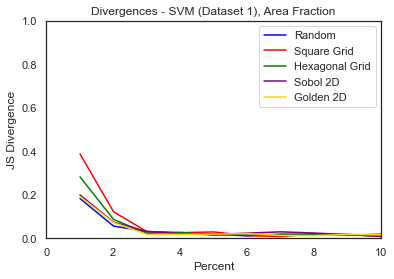

In [20]:
#plot JS results
plt.xlim(0,10)
plt.ylim(0,1)
plt.title('Divergences - SVM (Dataset 1), Area Fraction')
plt.xlabel('Percent')
plt.ylabel('JS Divergence')
sns.lineplot(percents,avg_random_div,color='blue',label='Random')
sns.lineplot(percents,avg_square_div,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_div,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_div,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_div,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_div,color='black',label='Window')

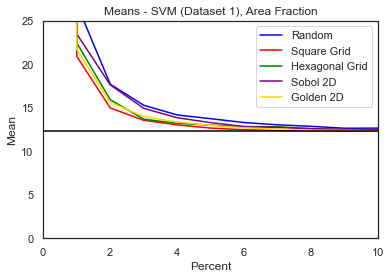

In [21]:
plt.xlim(0,10)
plt.ylim(0,25)
plt.title('Means - SVM (Dataset 1), Area Fraction')
plt.xlabel('Percent')
plt.ylabel('Mean')
sns.lineplot(percents,avg_random_mean,color='blue',label='Random')
sns.lineplot(percents,avg_square_mean,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_mean,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_mean,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_mean,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_var,color='black',label='Window')
#total mean
plt.axhline(y=total_mean_avg, color='black',label='Actual Mean')

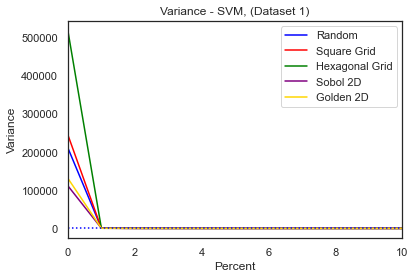

In [22]:
plt.xlim(0,10)
# plt.ylim(0,80)
plt.title('Variance - SVM, (Dataset 1)')
plt.xlabel('Percent')
plt.ylabel('Variance')
sns.lineplot(percents,avg_random_var,color='blue',label='Random')
sns.lineplot(percents,avg_square_var,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_var,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_var,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_var,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_var,color='black',label='Window')
#total var
plt.axhline(y=total_var_avg, color='blue', linestyle=':',label='Actual Mean')

In [23]:
avg_random_mean_error=(avg_random_mean-total_mean_avg)/total_mean_avg*100
avg_hex_mean_error=(avg_hex_mean-total_mean_avg)/total_mean_avg*100
avg_square_mean_error=(avg_square_mean-total_mean_avg)/total_mean_avg*100
avg_sobol_mean_error=(avg_sobol_mean-total_mean_avg)/total_mean_avg*100
avg_gold_mean_error=(avg_gold_mean-total_mean_avg)/total_mean_avg*100
avg_window_mean_error=(avg_window_mean-total_mean_avg)/total_mean_avg*100

<AxesSubplot:title={'center':'Percent Error of Means - SVM, (Dataset 1), Area Fraction'}, xlabel='Percent Sampled', ylabel='Percent Error'>

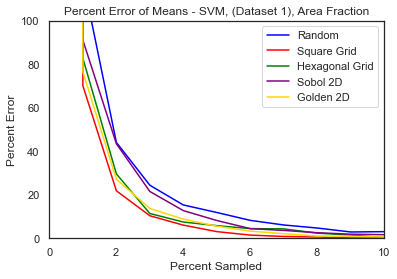

In [24]:
#view results
plt.xlim(0,10)
plt.ylim(0,100)
plt.title('Percent Error of Means - SVM, (Dataset 1), Area Fraction')
plt.xlabel('Percent Sampled')
plt.ylabel('Percent Error')
sns.lineplot(percents,avg_random_mean_error,color='blue',label='Random')
sns.lineplot(percents,avg_square_mean_error,color='red',label='Square Grid')
sns.lineplot(percents,avg_hex_mean_error,color='green',label='Hexagonal Grid')
sns.lineplot(percents,avg_sobol_mean_error,color='purple',label='Sobol 2D')
sns.lineplot(percents,avg_gold_mean_error,color='gold',label='Golden 2D')
# sns.lineplot(percents,avg_window_mean_error,color='black',label='Window')

In [28]:
%store avg_random_mean_error
%store avg_hex_mean_error
%store avg_square_mean_error
%store avg_sobol_mean_error
%store avg_gold_mean_error
%store avg_window_mean_error

Stored 'avg_random_mean_error' (ndarray)
Stored 'avg_hex_mean_error' (ndarray)
Stored 'avg_square_mean_error' (ndarray)
Stored 'avg_sobol_mean_error' (ndarray)
Stored 'avg_gold_mean_error' (ndarray)
Stored 'avg_window_mean_error' (ndarray)
